# DATA COLLECTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-input/test copy.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

Input dataset

In [4]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

colour palette 

In [5]:
# Define the number of colors in the gradient
num_colors = 30

# Define the starting and ending colors in RGB format (light pink to dark pink)
start_color = (255, 200, 220)  # Lighter Light Pink
end_color = (229, 0, 99)       # Darker Dark Pink

# Create a gradient of colors
gradient_colors = []
for i in range(num_colors):
    # Interpolate between start and end colors
    r = int(start_color[0] + (end_color[0] - start_color[0]) * (i / (num_colors - 1)))
    g = int(start_color[1] + (end_color[1] - start_color[1]) * (i / (num_colors - 1)))
    b = int(start_color[2] + (end_color[2] - start_color[2]) * (i / (num_colors - 1)))
    gradient_colors.append((r / 255, g / 255, b / 255))  # Convert to RGB scale

# Set the color palette for seaborn plots
sns.set_palette(gradient_colors)

# Set the color cycle for Matplotlib plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=gradient_colors)


# **DATA EXPLORATION**

In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

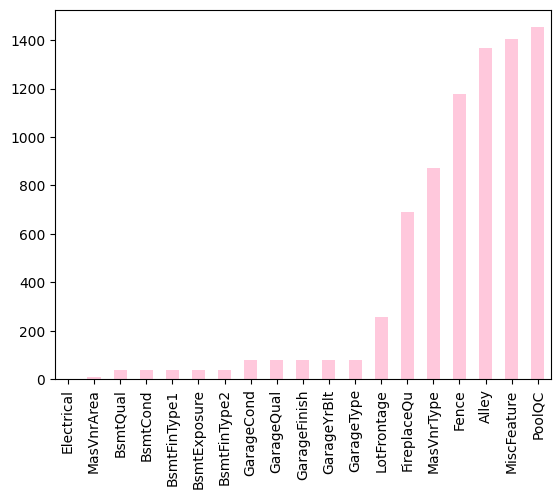

In [10]:
NULL = train_df.isnull().sum()
NULL = NULL[NULL > 0]
NULL.sort_values(inplace = True)
NULL.plot.bar()

In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*the mean is oddly high*

<Axes: xlabel='SalePrice', ylabel='Density'>

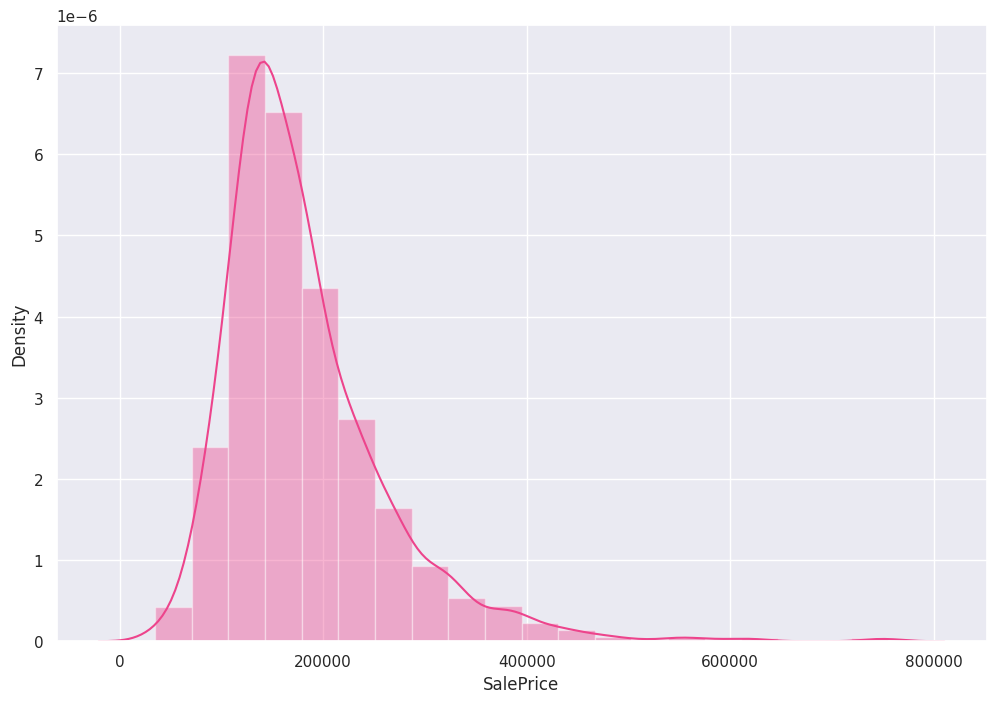

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(train_df['SalePrice'],bins=20,color=gradient_colors[19])

apperantly its skewed 

Finding outliers 

In [13]:
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
categorical_features = train_df.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
correlation = numerical_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

*we'll drop the features with poor correlation* -LotFrontage, WoodDeckSF, 2ndFlrSF, OpenPorchSF, HalfBath, LotArea, BsmtFullBath, BsmtUnfSF, BedroomAbvGr, ScreenPorch, PoolArea, MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, Id, LowQualFinSF, YrSold, OverallCond, MSSubClass, EnclosedPorch, KitchenAbvGr    


<Axes: title={'center': 'Correlation of numerical features with sale price'}>

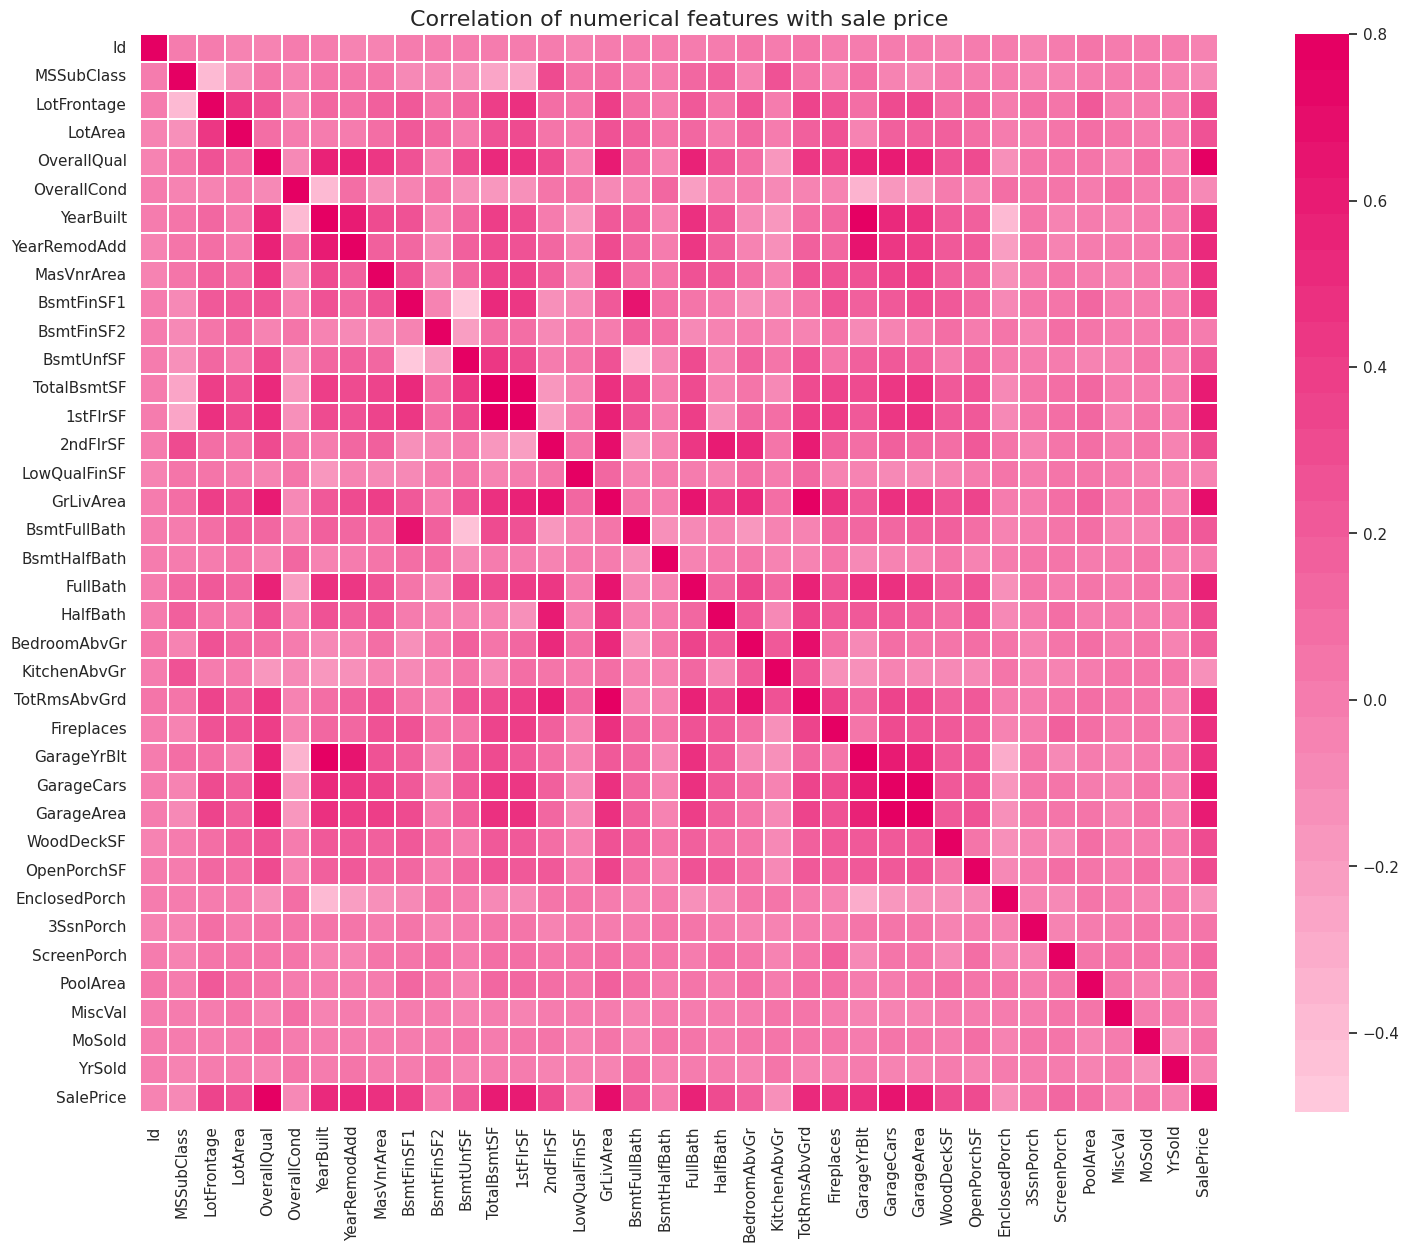

In [16]:
f, ax = plt.subplots(figsize = (20,14))
plt.title('Correlation of numerical features with sale price',y=1,size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap=gradient_colors, linewidths=0.01, linecolor="white",annot_kws={'size': 12})

*apperantly each of Id, MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, EnclosedPorchSF, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, have very poor correlation with the sale price*

In [17]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8256674841743421

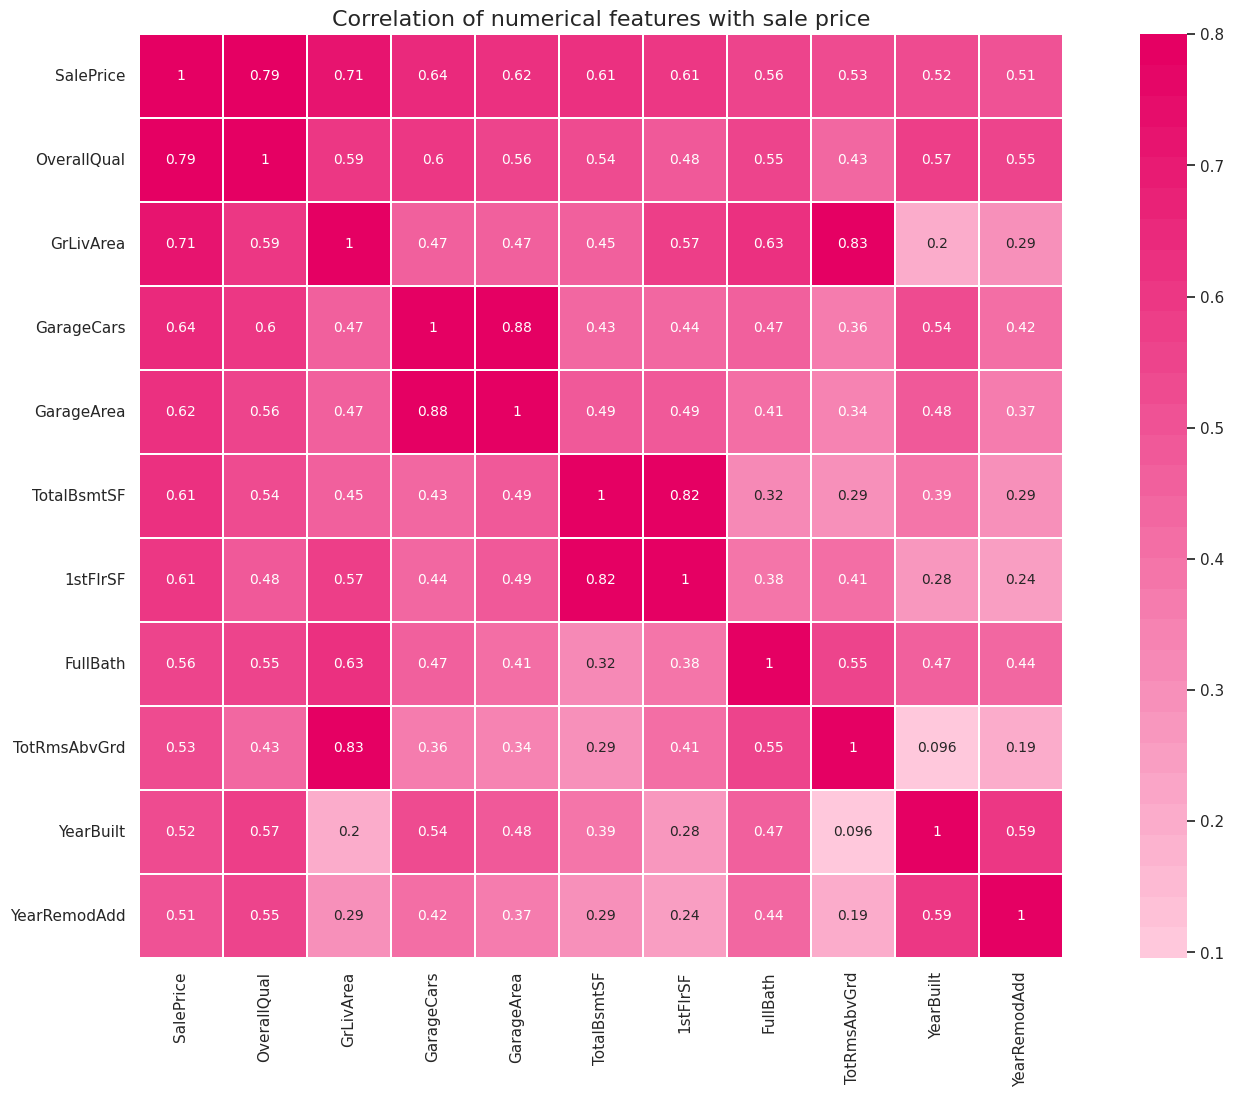

In [18]:
# Selecting the top k features with highest correlation with 'SalePrice'
k = 11
cols = correlation['SalePrice'].nlargest(k).index[:]

# Calculate the correlation matrix for the selected features
cm = np.corrcoef(train_df[cols].values.T)

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot the heatmap with the pink gradient colormap
sns.heatmap(cm, square=True, vmax=0.8, cmap=gradient_colors, annot=True, linewidths=0.01, linecolor="white",
            xticklabels=cols.values, yticklabels=cols.values, annot_kws={'size': 10})

# Set the title
plt.title('Correlation of numerical features with sale price', y=1, size=16)

# Show the plot
plt.show()


*This shows multicollinearity between features, features with high multicollinearity should be extracted*
*-GrLivArea <-> TotRmsAbvGr ,     GarageCars <-> GarageArea, TotalBsmtSF <-> 1stFlrSF*

In [19]:
# Define the number of colors in the gradient
num_colors = 30

# Define the starting and ending colors in RGB format (light pink to dark pink)
start_color = (255, 200, 220)  # Lighter Light Pink
end_color = (229, 0, 99)       # Darker Dark Pink

# Create a gradient of colors
gradient_colors = []
for i in range(num_colors):
    # Interpolate between start and end colors
    r = int(start_color[0] + (end_color[0] - start_color[0]) * (i / (num_colors - 1)))
    g = int(start_color[1] + (end_color[1] - start_color[1]) * (i / (num_colors - 1)))
    b = int(start_color[2] + (end_color[2] - start_color[2]) * (i / (num_colors - 1)))
    gradient_colors.append((r / 255, g / 255, b / 255))  # Convert to RGB scale

# Set the color palette for seaborn plots
sns.set_palette(gradient_colors)

# Set the color cycle for Matplotlib plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=gradient_colors)


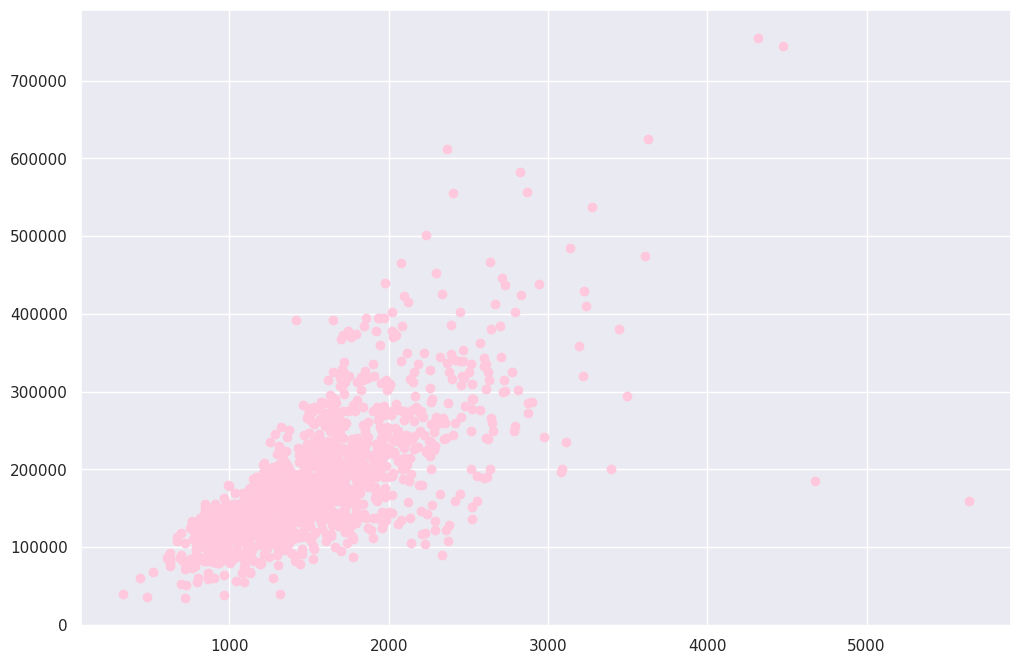

In [20]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

*outlier > 4000*

In [21]:
train_df.query('GrLivArea > 4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


*drop 524, 692, 1183, 1299*

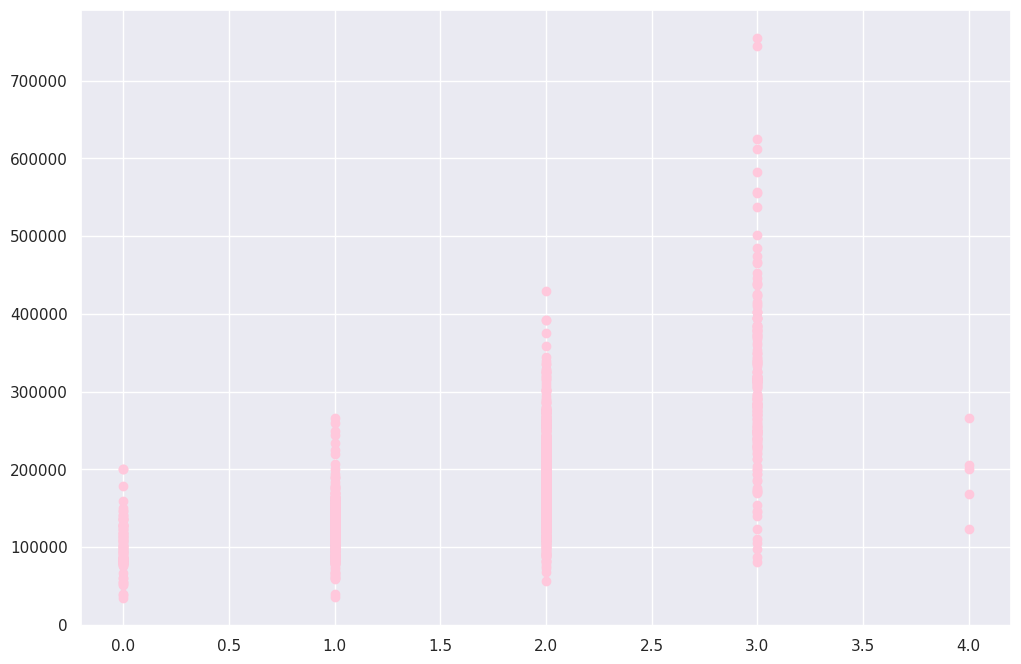

In [22]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

In [23]:
train_df.query('GarageCars == 4.0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


*Drop ID 421, 748, 1191, 1341, 1351*

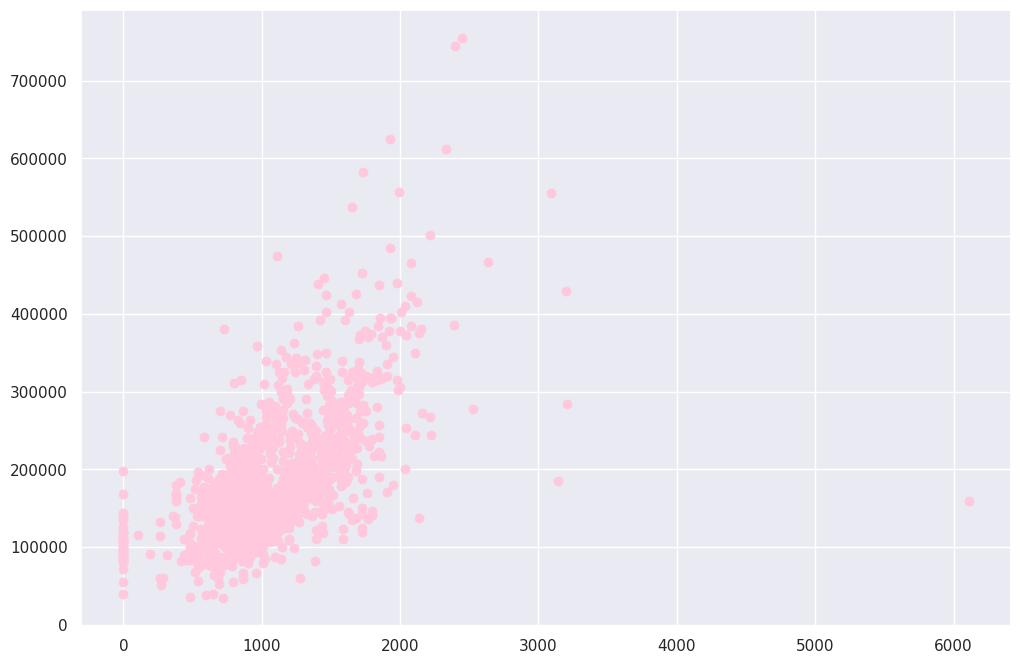

In [24]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

outliers > 3000

In [25]:
train_df.query('TotalBsmtSF > 3000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


*drop ID 333, 441, 497, 524,1299*

In [26]:
stats.zscore(train_df['TotalBsmtSF']).sort_values().tail(10)

224      3.043108
1182     3.052229
691      3.161680
1044     3.344097
1373     3.592640
440      4.643820
523      4.744149
496      4.885522
332      4.899204
1298    11.520949
Name: TotalBsmtSF, dtype: float64

ensuring the assumption of 333, 441, 497, 524,1299 being outliers


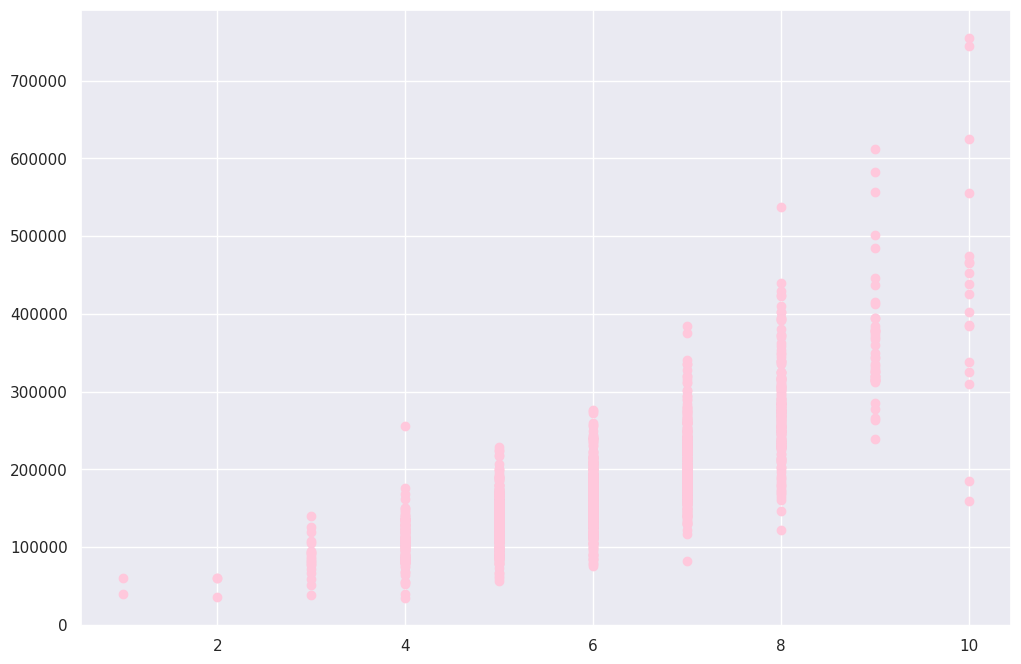

In [27]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [28]:
train_df.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


*sale price of 524, 1299 is very low comparing with the rest*

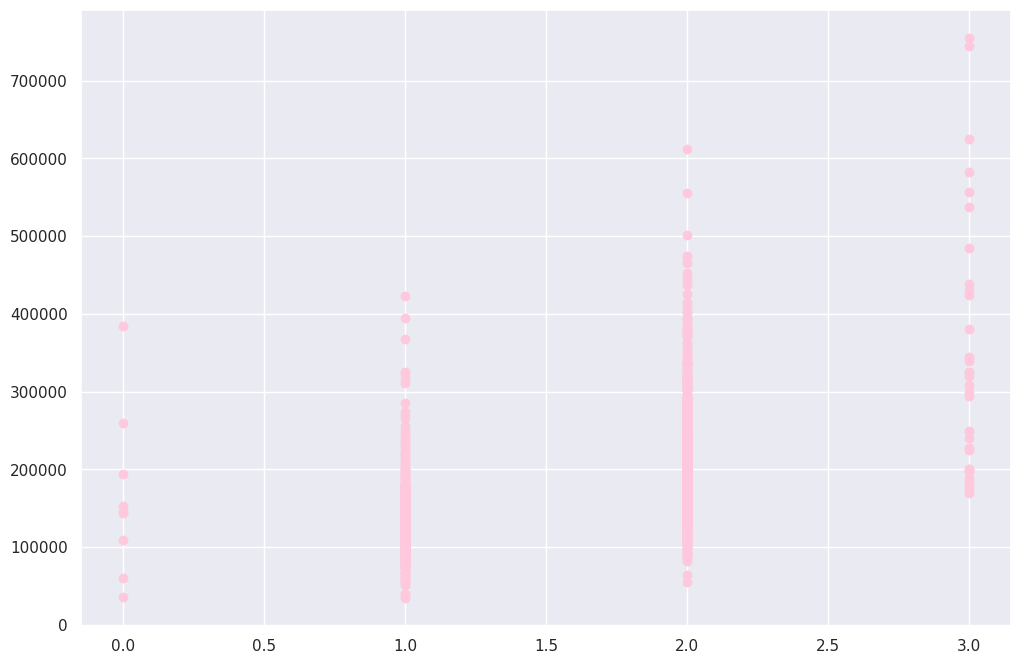

In [29]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)

In [30]:
train_df.query("FullBath == 0 & SalePrice > 300000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


*the sale price of 54 is very high comparing to the rest*

In [31]:
train_df.query("FullBath == 3.0 & SalePrice > 600000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*the sale price of 692, 1170, 1183 is oddly high*

In [32]:
train_df.query("FullBath == 2.0 & SalePrice > 600000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


*the sale price of 899 is oddly high*

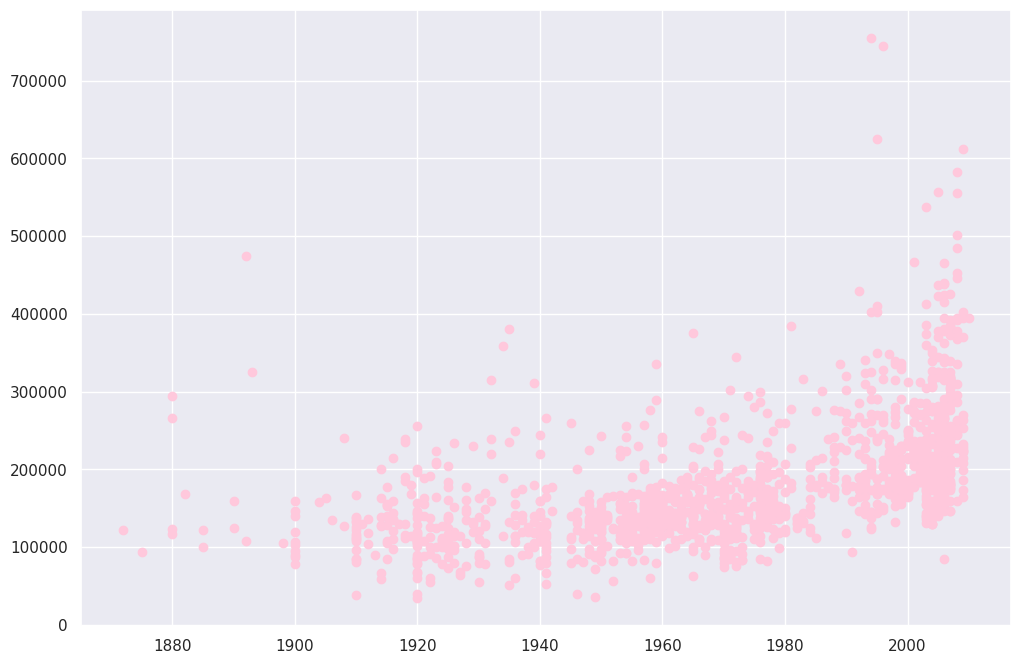

In [33]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [34]:
train_df.query('YearBuilt <= 1900 & SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000


*the sales are oddly high at 186, 584*

In [35]:
train_df.query('YearBuilt > 1900 & SalePrice > 600000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*sales at 692, 1183 are oddly high*

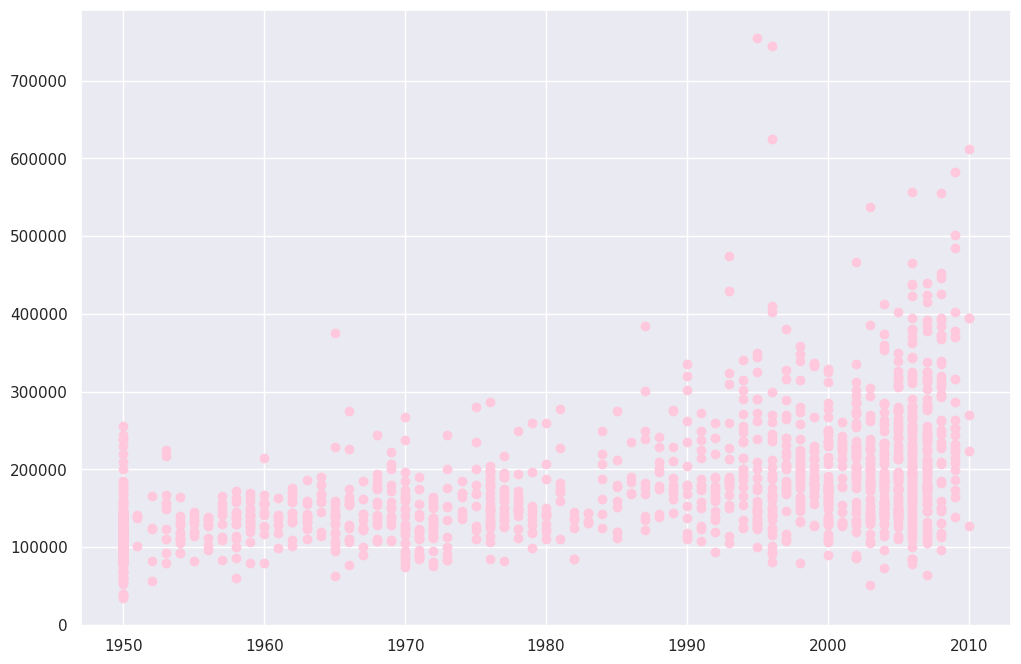

In [36]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [37]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


*the sales at 314 are oddly high*

In [38]:
train_df.query('YearRemodAdd < 2000 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*the sales at 692, 1170, 1183 are oddly high*

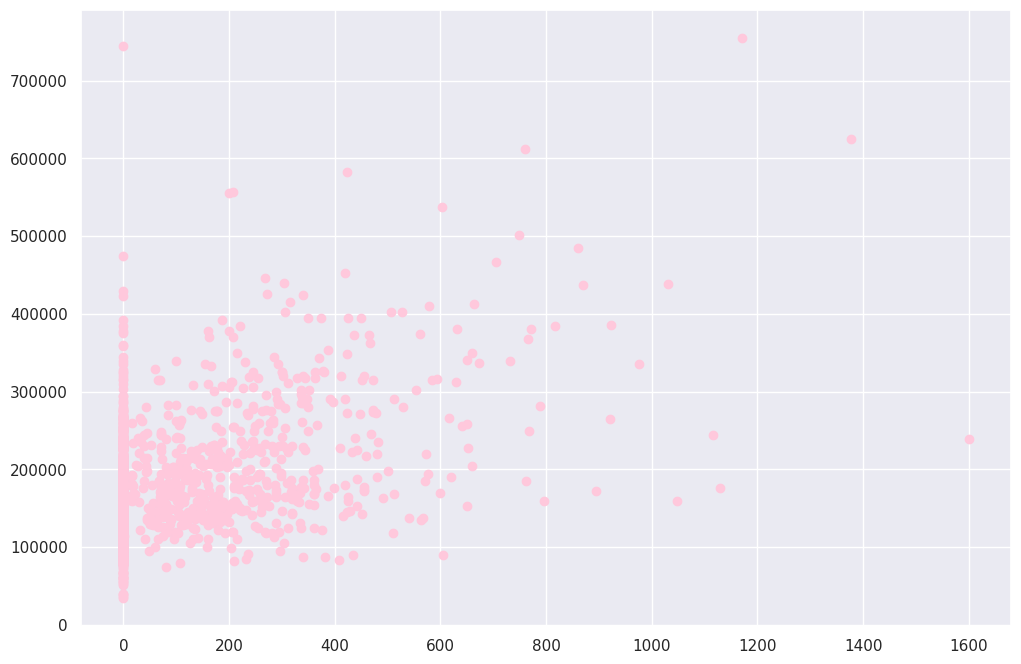

In [39]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [40]:
train_df.query('MasVnrArea > 1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


*the sales at 298, 1170 are odd*

In [41]:
train_df.query('MasVnrArea < 1200 & SalePrice > 600000 ')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*the sales at 692, 899, 1183 are odd*

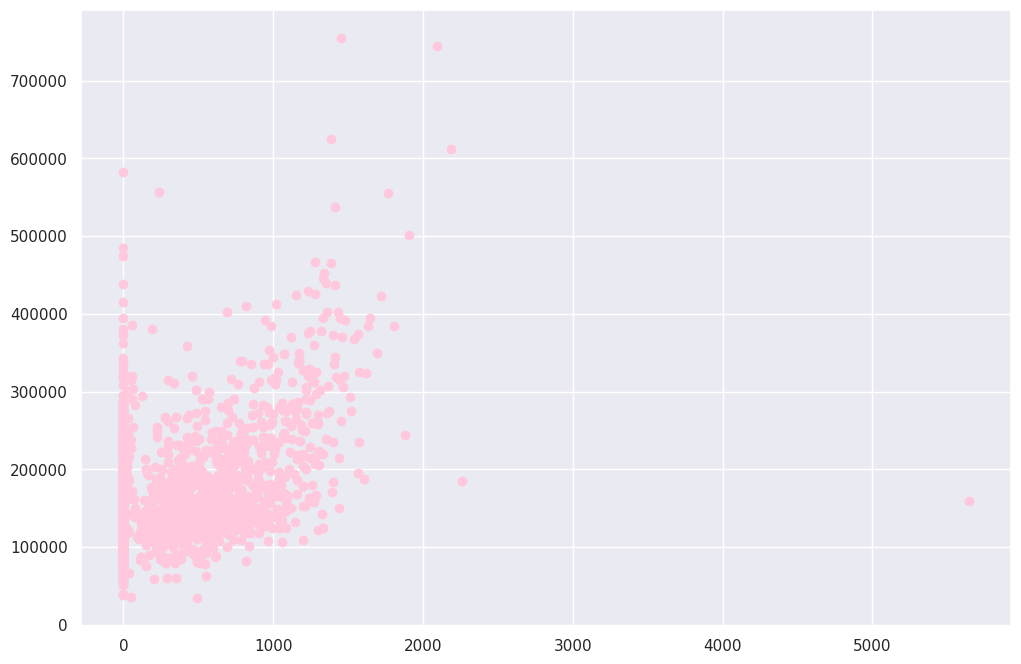

In [42]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [43]:
train_df.query('BsmtFinSF1 > 2500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


*the sales at 1299 are odd*

In [44]:
train_df.query('BsmtFinSF1 < 2500 & SalePrice > 650000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


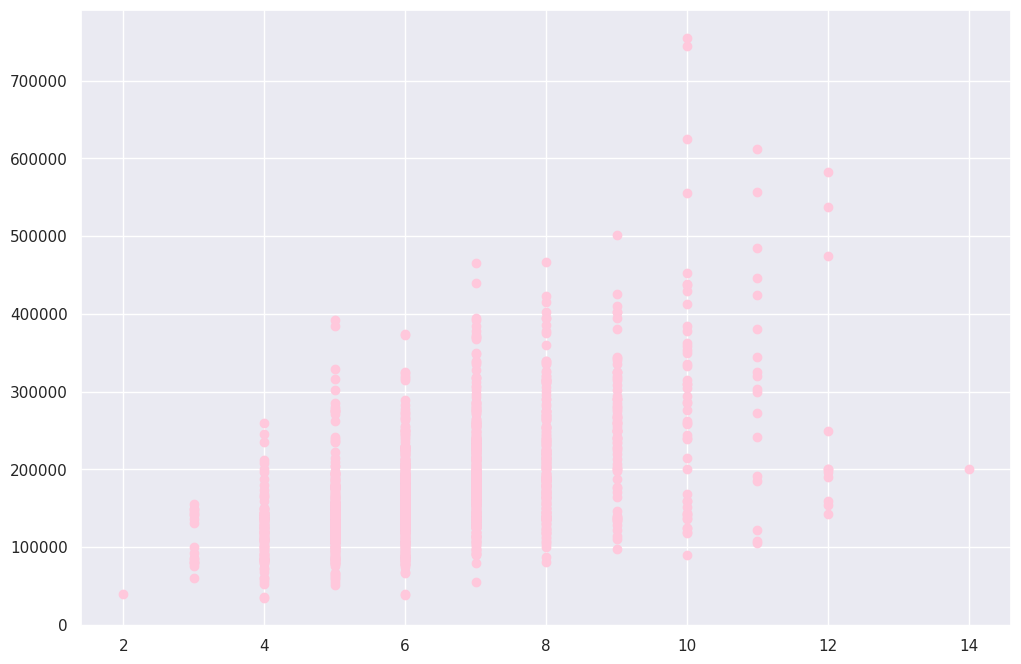

In [45]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

In [46]:
train_df.query('TotRmsAbvGrd == 14 & SalePrice < 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


*636 oddly low*

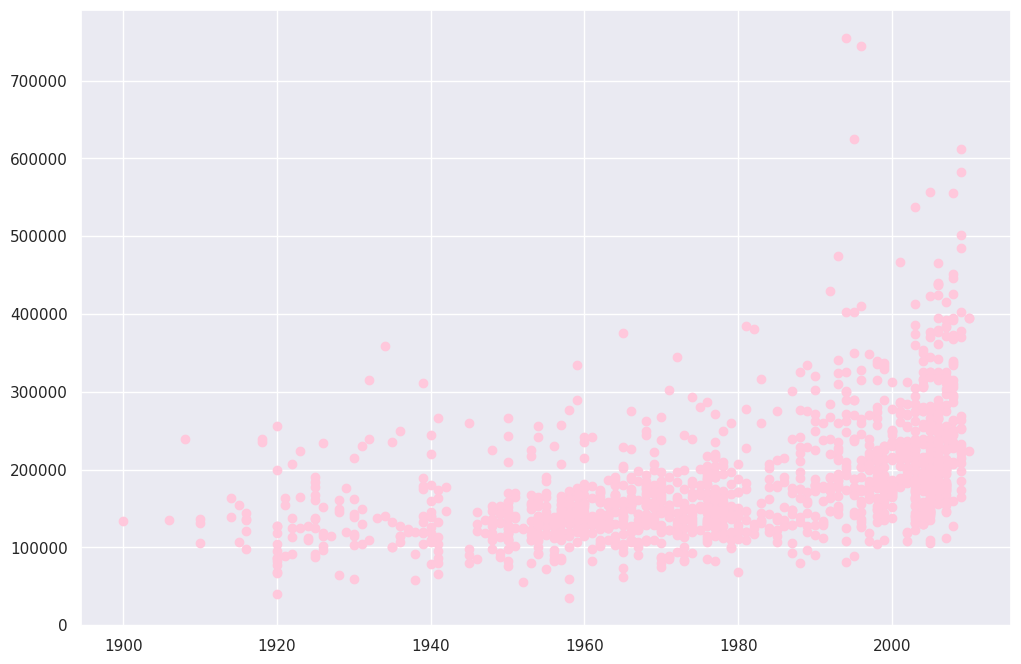

In [47]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

In [48]:
train_df.query('GarageYrBlt < 2000 & SalePrice > 600000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*692, 1170, 1183 out of boundaries*

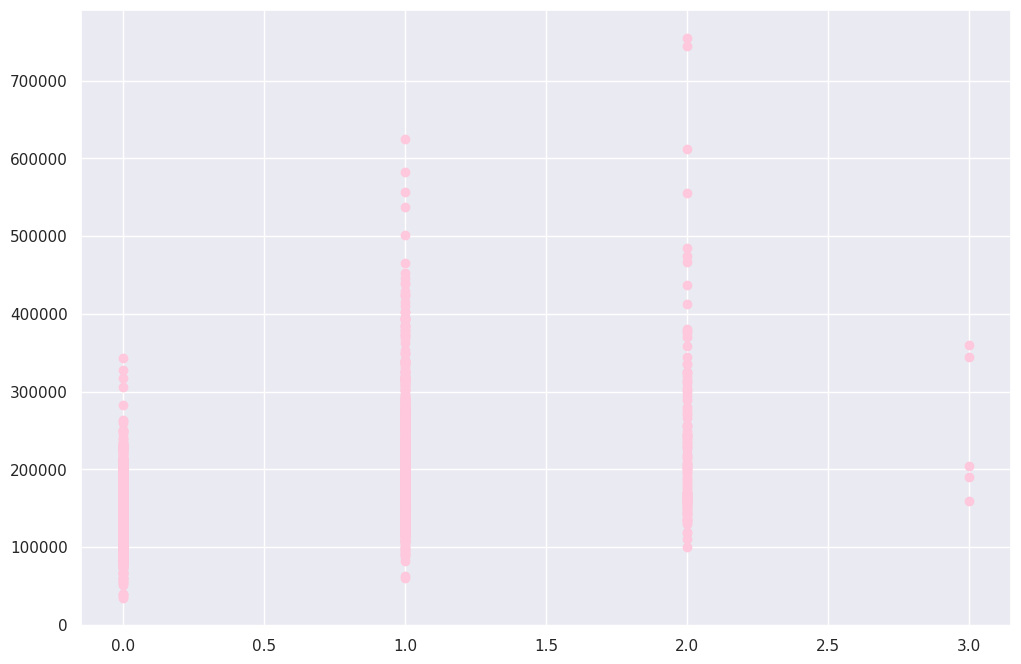

In [49]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

In [50]:
train_df.query('Fireplaces == 3.0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
605,606,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
642,643,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,345000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


*oddly low at 3, IDs -> 167, 310, 606, 643, 1299*

In [51]:
values = [524, 692, 1183, 1299, 421, 748, 1191, 1341, 1351, 333, 441, 497, 1299, 54, 1170, 899, 186, 584, 314, 298, 636, 167, 310, 606, 643]

In [52]:
train_df = train_df[train_df.Id.isin(values) == False]

In [53]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1431
MiscFeature,1382
Alley,1348
Fence,1160
MasVnrType,860
FireplaceQu,686
LotFrontage,256
GarageYrBlt,80
GarageCond,80
GarageType,80


In [55]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [56]:
train_df['GarageCond'].isnull().sum()

80

In [57]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

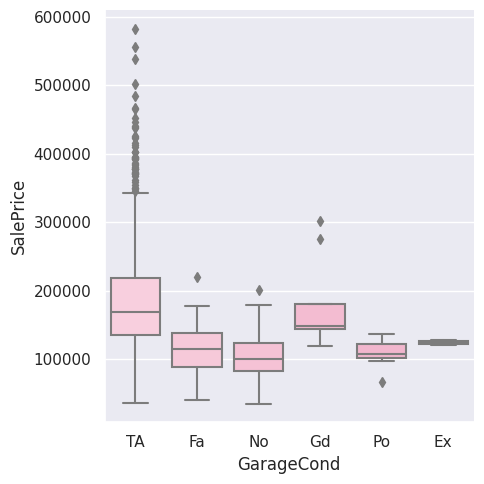

In [58]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [59]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [60]:
train_df['GarageType'].isnull().sum()

80

In [61]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

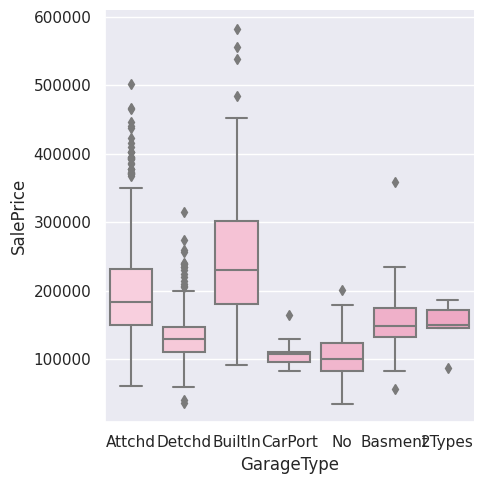

In [62]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [63]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

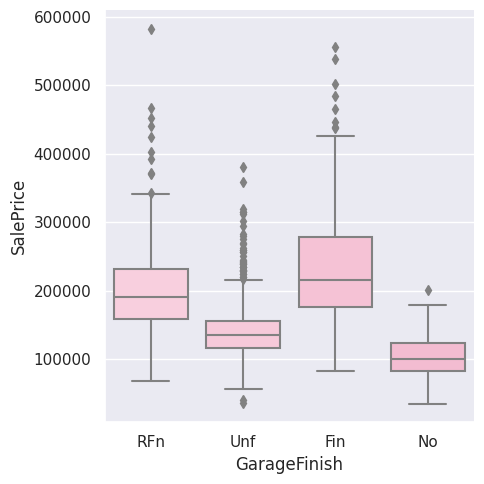

In [64]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [65]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [66]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

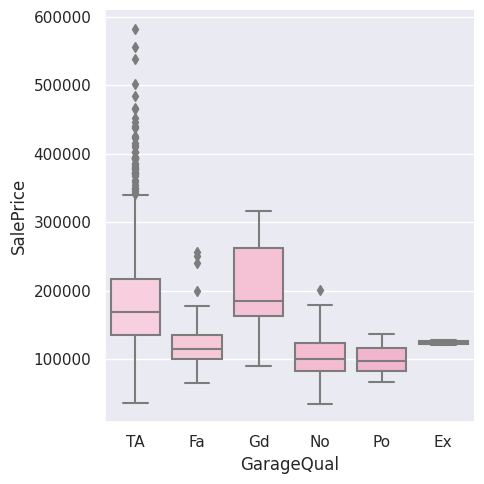

In [67]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [68]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [69]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

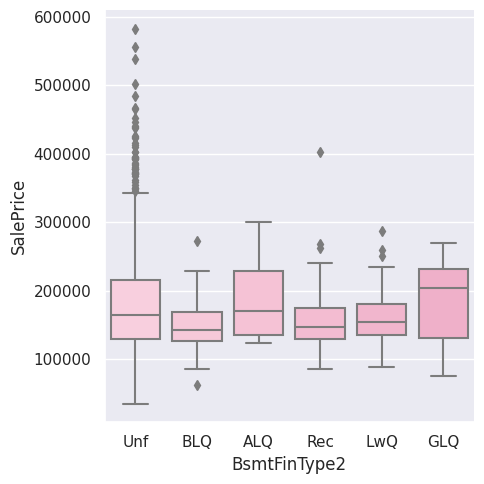

In [70]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [71]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [72]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

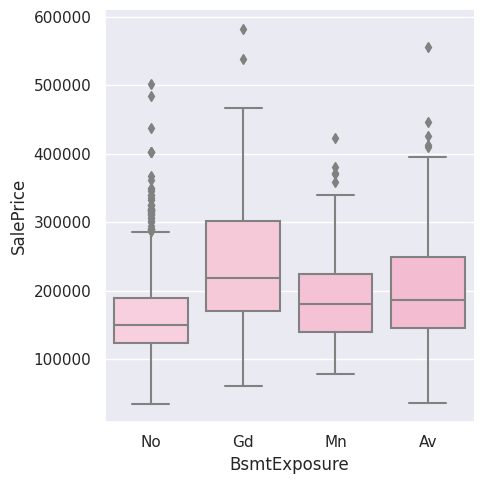

In [73]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [74]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [75]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

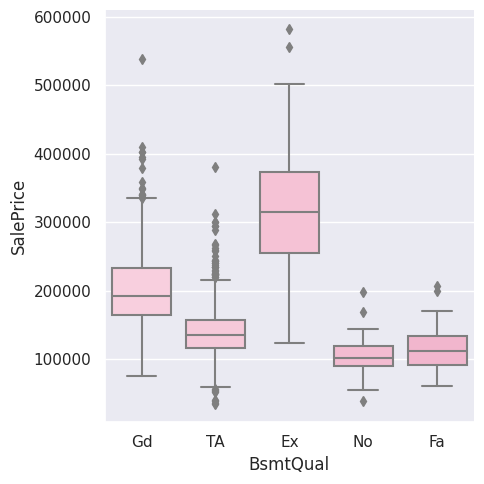

In [76]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [77]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [78]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

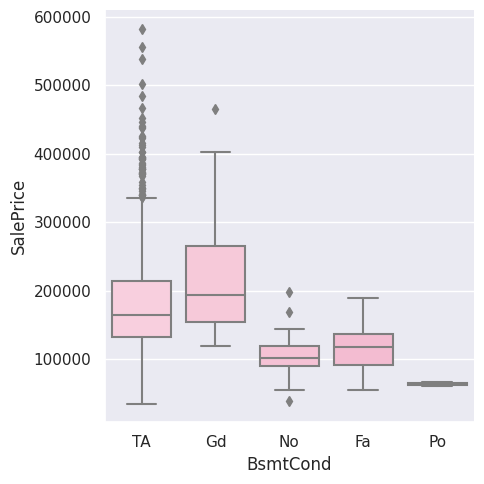

In [79]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [80]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [81]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

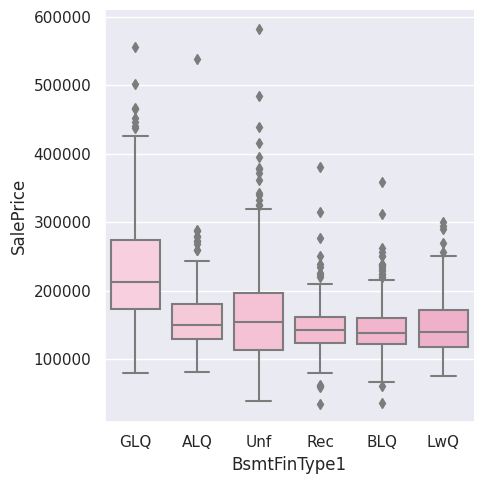

In [82]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [83]:
train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [84]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [85]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [86]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

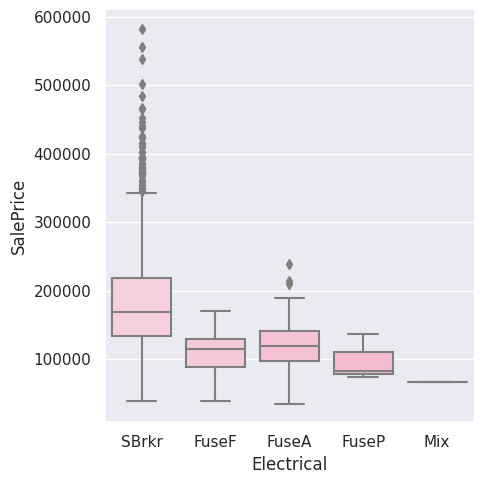

In [87]:
sns.catplot(data=train_df, x="Electrical", y="SalePrice", kind="box")

In [88]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2','FireplaceQu','LotFrontage','MasVnrType'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2','FireplaceQu','LotFrontage','MasVnrType'])

# Feature Engineering  

In [89]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [90]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [91]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [92]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [93]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

In [94]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [95]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'

In [96]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF','MSSubClass','LotArea','BsmtUnfSF','BedroomAbvGr','PoolArea','MoSold','MiscVal','LowQualFinSF','OverallCond','KitchenAbvGr','GarageArea'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF','MSSubClass','LotArea','BsmtUnfSF','BedroomAbvGr','PoolArea','MoSold','MiscVal','LowQualFinSF','OverallCond','KitchenAbvGr','GarageArea'])

In [97]:
train_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition', 'SalePrice', 'houseage', 'houseremodelage', 'totalsf',
       'totalarea', 'totalbaths', 'totalporchsf'],
      dtype='object')

In [98]:
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['OverallQual', 'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'SalePrice', 'houseage', 'houseremodelage', 'totalsf', 'totalarea',
       'totalbaths', 'totalporchsf'],
      dtype='object')

<Axes: >

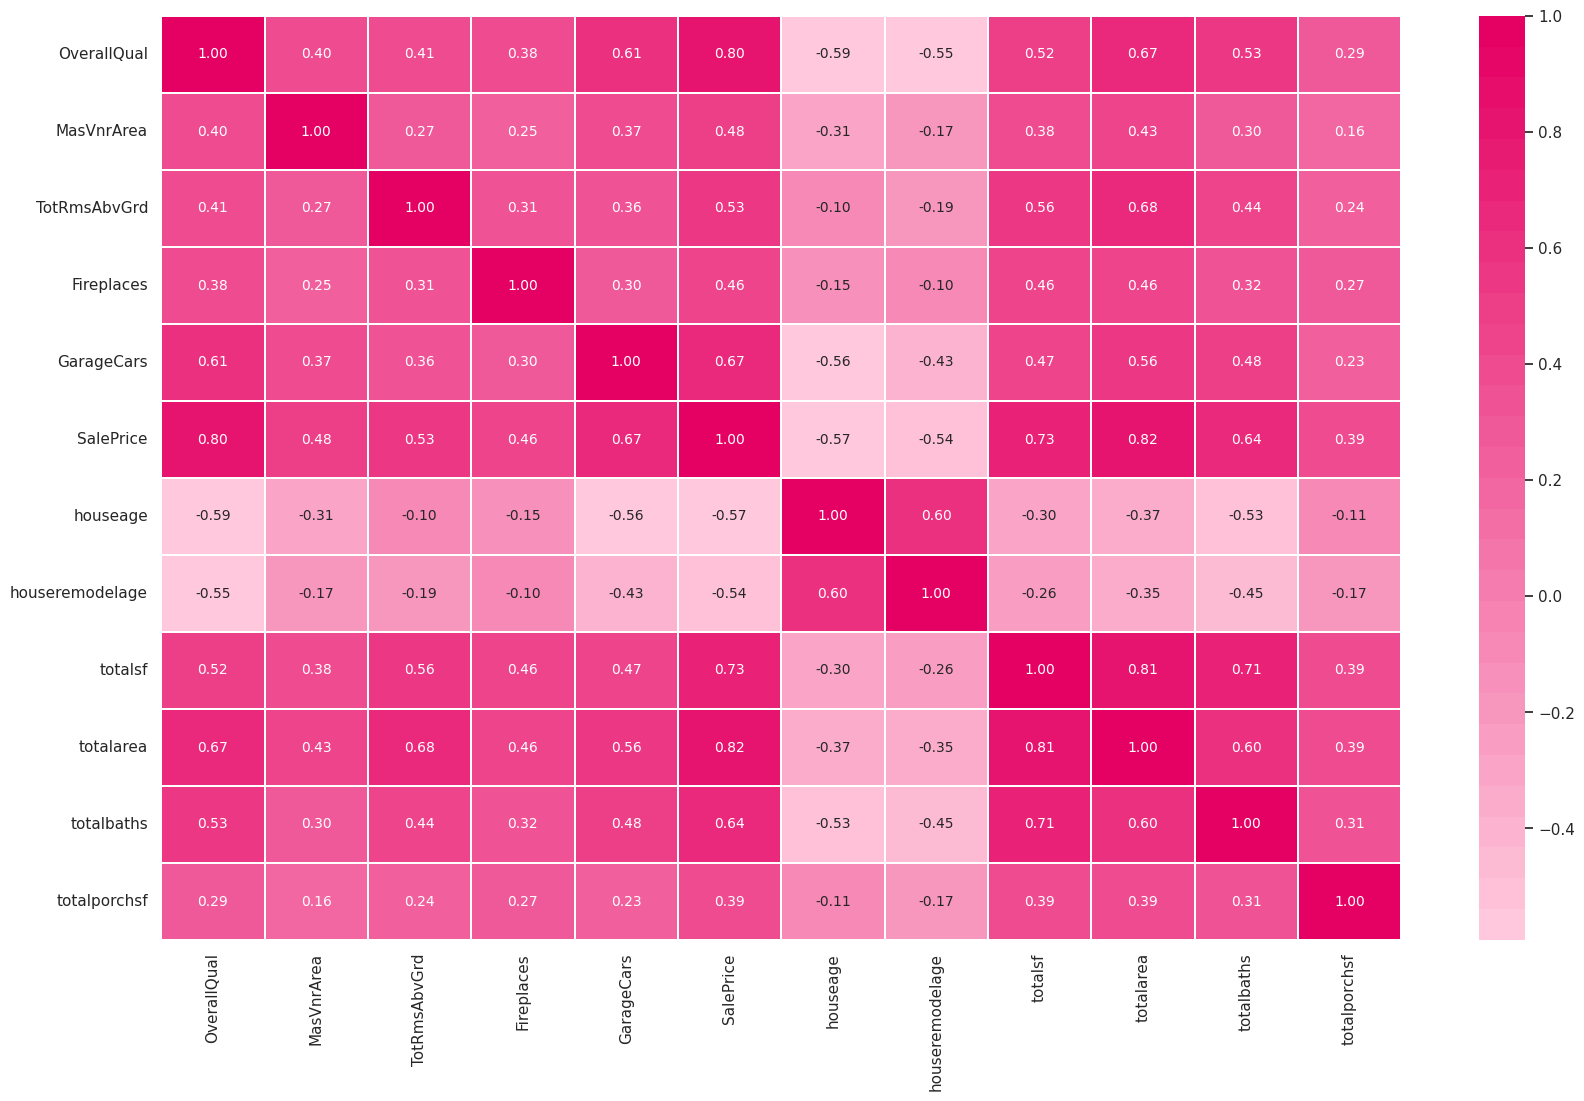

In [99]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True,cmap=gradient_colors, fmt=".2f", linewidths=0.01, linecolor="white", annot_kws={'size': 10})

# PREPROCESSING

<Axes: xlabel='SalePrice', ylabel='Count'>

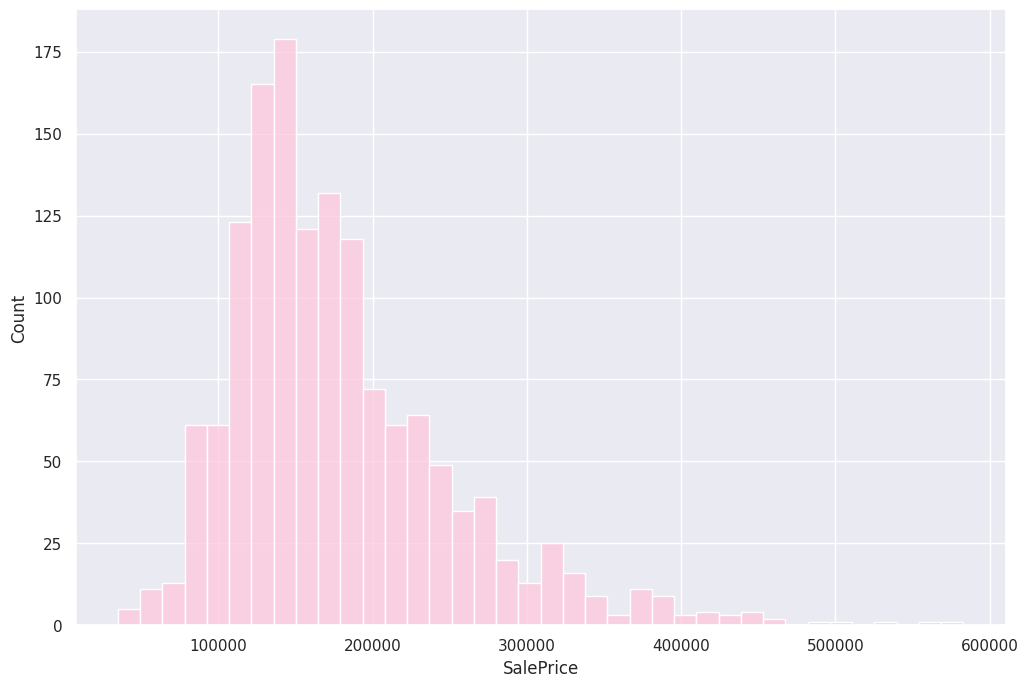

In [100]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

SKWED 


In [101]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

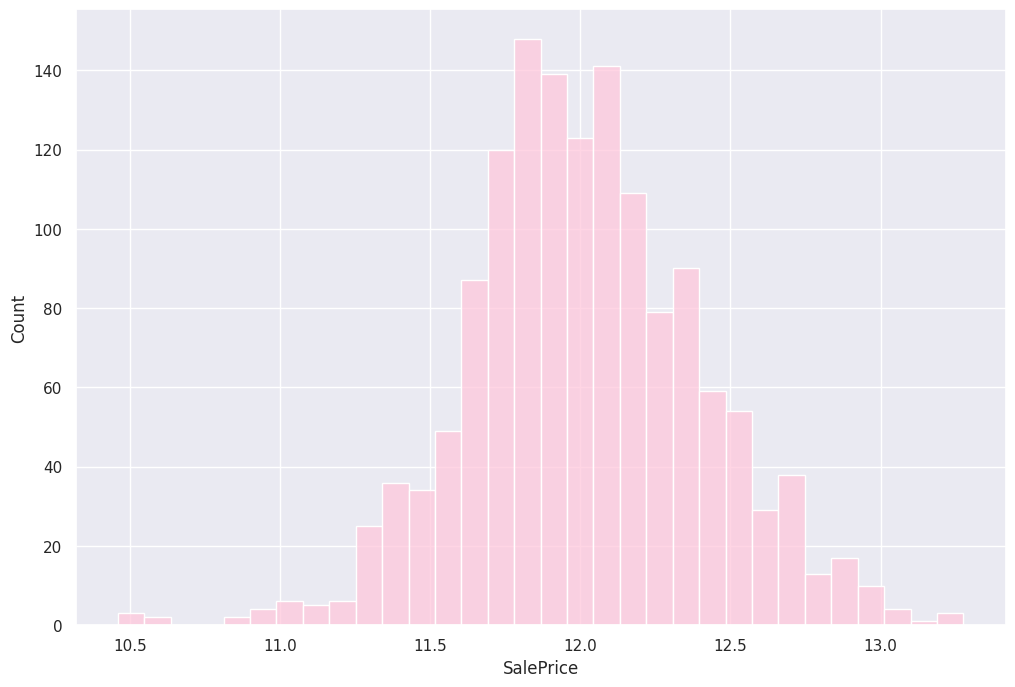

In [102]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

After being normalized 

In [103]:
categorical_features = train_df.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [104]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

ORDINAL ENCODER

In [105]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

ONE HOT ENCODER

In [106]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [107]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [108]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [109]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [110]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [111]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [112]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [113]:
X_preprocessed = pipeline.fit_transform(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

# MODEL TRAINING 

**linear regression**

In [115]:
lr = LinearRegression()

In [116]:
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
lr.score(X_train, y_train)

0.9286596484525619

**LOSS FUNCTION**

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
y_pred_lr = lr.predict(X_test)

In [120]:
mean_squared_error(y_test, y_pred_lr)

5.781935854919882e+16

In [121]:
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

In [122]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 57819358549198816.00
Mean Absolute Error: 19799102.68
R-squared: -353483754690641344.00


In [123]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_lr,'Difference':y_test-y_pred_lr})
pred_df

,Actual Value,Predicted Value,Difference
978,11.608245,1.157500e+01,3.324779e-02
124,12.106258,1.203474e+01,7.151357e-02
1434,11.982935,1.201909e+01,-3.615340e-02
903,12.388398,1.243245e+01,-4.405097e-02
1119,11.803361,1.182822e+01,-2.485531e-02
...,...,...,...
1244,12.345839,1.218423e+01,1.616043e-01
748,12.469978,1.241826e+01,5.171936e-02
692,12.721889,1.256506e+01,1.568253e-01
1270,12.468441,2.363019e+09,-2.363019e+09


**SVM**

In [124]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=20, epsilon=0.1)
svm.fit(X_train, y_train)

SVR(C=20)

In [125]:
svm.score(X_train, y_train)

0.9624242974169837

In [126]:
y_pred_svm = svm.predict(X_test)

In [127]:
mean_squared_error(y_test, y_pred_svm)

0.01998050907254621

**LOSS FUNCTION**

In [128]:
mse = mean_squared_error(y_test, y_pred_svm)
mae = mean_absolute_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

In [129]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.02
Mean Absolute Error: 0.10
R-squared: 0.88


In [130]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_svm,'Difference':y_test-y_pred_svm})
pred_df

,Actual Value,Predicted Value,Difference
978,11.608245,11.534836,0.073409
124,12.106258,11.915400,0.190858
1434,11.982935,12.006251,-0.023316
903,12.388398,12.474084,-0.085686
1119,11.803361,11.789235,0.014126
...,...,...,...
1244,12.345839,12.212497,0.133342
748,12.469978,12.445222,0.024756
692,12.721889,12.546368,0.175521
1270,12.468441,12.322177,0.146264


# HYPERPARAMETER TUNING 

**CROSS VALIDATION**

In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [132]:
folds = KFold(n_splits=8, shuffle=True, random_state=50)

scoring = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}
cv_results = cross_validate(svm, X_train, y_train, scoring=scoring, cv=folds)


scores_r2 = cv_results['test_r2']
scores_mse = cv_results['test_neg_mean_squared_error']

In [133]:
r2 = np.max(scores_r2)
rmse = -np.max(scores_mse)

In [134]:
print("R-squared in SVM:" ,r2)
print("RMSE in SVM:" ,rmse)

R-squared in SVM: 0.9128618325393366
RMSE in SVM: 0.013522139355608894


In [135]:
#best_svm.score(X_train, y_train)

# PLOTTING  MODELS

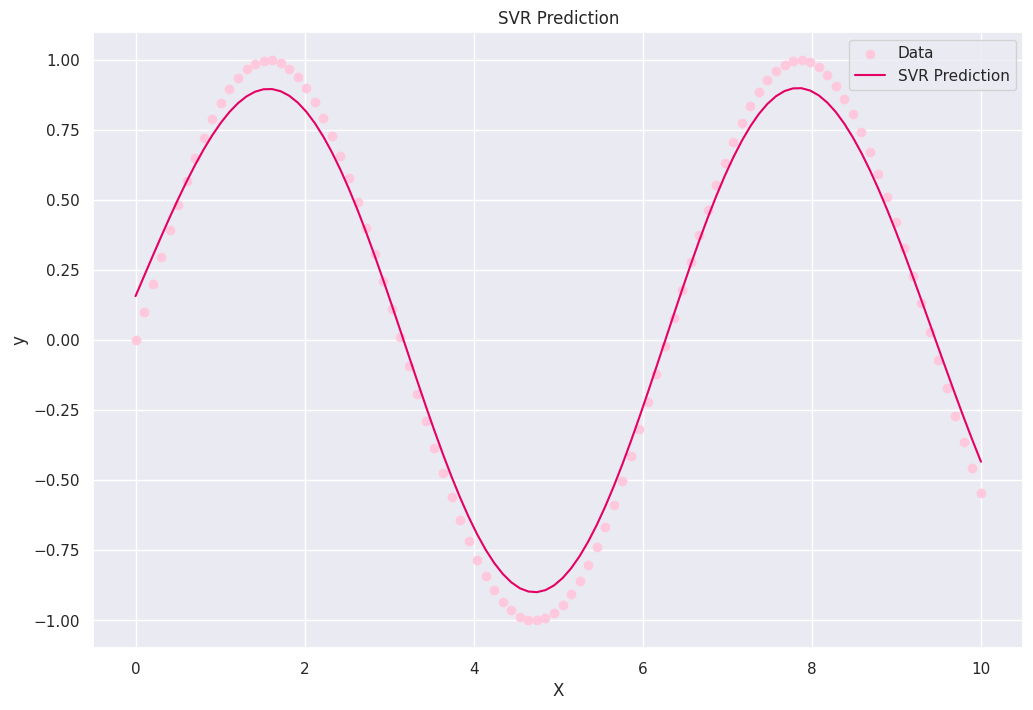

In [136]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel()

# Fit SVR model
svr = SVR(kernel='rbf')
svr.fit(X, y)

# Make predictions
y_pred = svr.predict(X)

# Plot data and predictions
plt.scatter(X, y, color=gradient_colors[0], label='Data')
plt.plot(X, y_pred, color=gradient_colors[29], label='SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Prediction')
plt.legend()
plt.show()

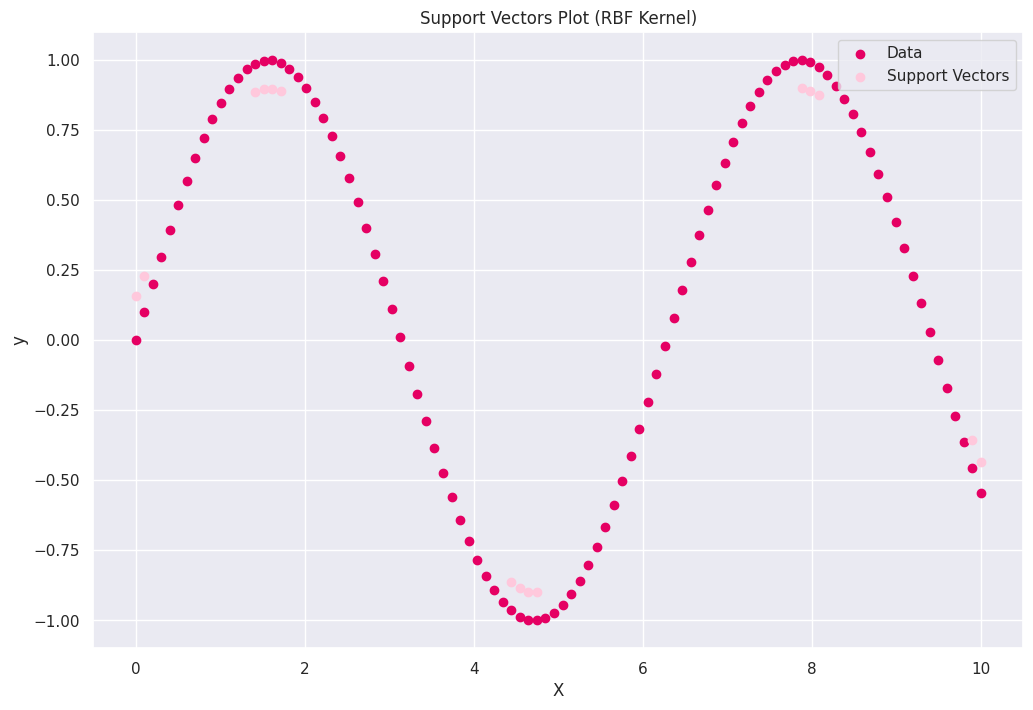

In [137]:
# Assuming an RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X, y)

# Get support vectors for RBF kernel
support_vectors_rbf = X[svr_rbf.support_]
support_vectors_rbf_pred = svr_rbf.predict(support_vectors_rbf)

# Plot support vectors
plt.scatter(X, y, color=gradient_colors[29], label='Data')
plt.scatter(support_vectors_rbf, support_vectors_rbf_pred, color=gradient_colors[0], label='Support Vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vectors Plot (RBF Kernel)')
plt.legend()
plt.show()

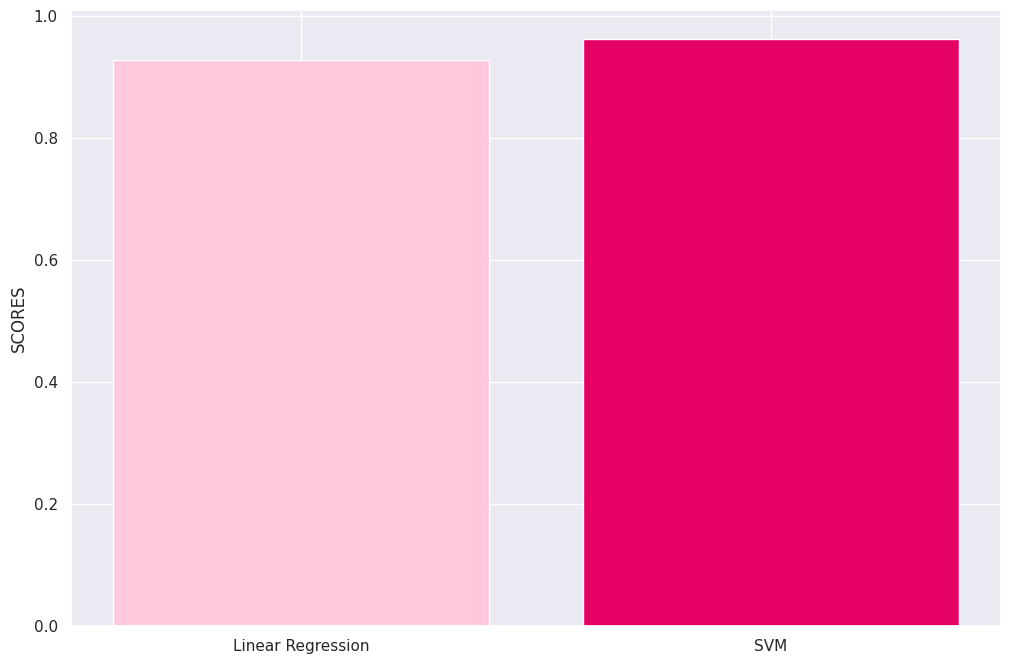

In [138]:
plt.bar(x=['Linear Regression', 'SVM'],
        height=[lr.score(X_train, y_train), svm.score(X_train, y_train)],
        color=[gradient_colors[0], gradient_colors[29]])
plt.ylabel("SCORES")
plt.show()
